# ECS708P mini-project submission

Name: Huixiang Huang
ID: 200258942





## Background

For basic tasks, I used **librose** to extract **mel spectrogram** as a feature. Then through the model selection function, I judged that the model that best fits the data is **RandomForestClassifier**.It can predict different intonations [question,'excited','neutral','bored'].

# 1 Basic solution


### Loading basic libraries


In [86]:
# basic libraries

import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

In [88]:
# other function
from tqdm import tqdm
import os
import librosa
import librosa.display
import glob 
import skimage
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
path = '/content/drive/MyDrive/Data/MLEnd'
os.listdir(path)

['trainingMLEnd.csv', 'training.zip', 'training']

### View Features

In [90]:
files = glob.glob('/content/drive/MyDrive/Data/MLEnd/training/*/*.wav')
len(files)

20000

In [91]:
for _ in range(5):
  n = np.random.randint(20000)
  display(ipd.Audio(files[n]))

Using the librosa module to load audio files, ` librosa.load()` loads audio files with a default sample rate (sr) of 22050HZ mono. we can change the sample frequency with ` librosa.load(path,sr=44100)`

In [92]:
data1, sampling_rate1 = librosa.load(files[1])

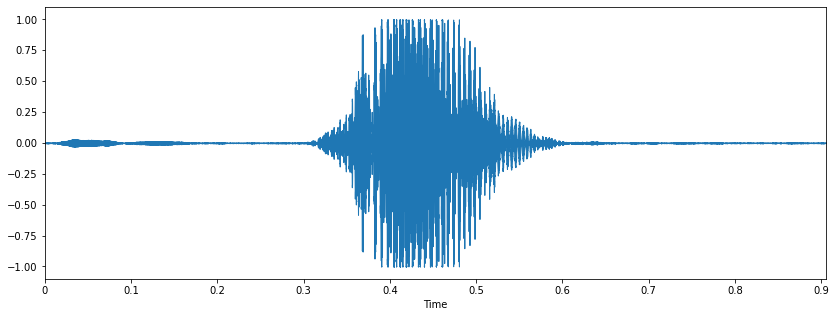

In [93]:
# Sound Wave Amplitude Envelope Diagram
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data1,sr=sampling_rate1)

#### spectrogram

Text(0.5, 1.0, 'Linear-frequency power spectrogram of aloe')

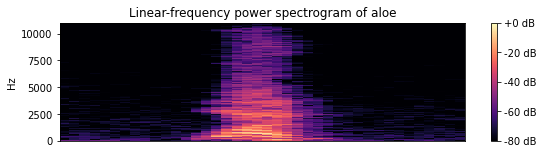

In [94]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram of aloe')

### Feature extraction and dataset building

#### Build dataset

We use `csv`file to get different categories.

In [114]:
labels = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/trainingMLEnd.csv')
labels.loc[:,'intonation'].drop_duplicates()
labels

,File ID,digit_label,participant,intonation
0,0000000.wav,4,S73,question
1,0000001.wav,2,S88,excited
2,0000002.wav,70,S5,neutral
3,0000003.wav,2,S85,bored
4,0000004.wav,4,S30,excited
...,...,...,...,...
19995,0019995.wav,90,S163,excited
19996,0019996.wav,10,S99,question
19997,0019997.wav,90,S46,question
19998,0019998.wav,19,S13,neutral


In [96]:
# show the dic_intonation
dic_intonation['0000001.wav'] # eg:0000001.wav----> excited

'excited'

In [121]:
def getXy(files,labels_file,cls2label):
  X,y =[],[]
  for file in tqdm(files):
    xi = list()
    fileID = file.split('/')[-1]
    yi = cls2label[list(labels_file[labels_file['File ID']==fileID]['intonation'])[0]]
    fs = None
    x, fs = librosa.load(file,sr=fs)
    chroma_stft = librosa.feature.chroma_stft(x, fs)
    rmse = librosa.feature.rms(x)
    spec_cent = librosa.feature.spectral_centroid(x, fs)
    spec_bw = librosa.feature.spectral_bandwidth(x, fs)
    rolloff = librosa.feature.spectral_rolloff(x, fs)
    zcr = librosa.feature.zero_crossing_rate(x)
    mfcc = librosa.feature.mfcc(x, fs)
    xi.append(np.mean(chroma_stft))
    xi.append(np.mean(rmse))
    xi.append(np.mean(spec_cent))
    xi.append(np.mean(spec_bw))
    xi.append(np.mean(rolloff))
    xi.append(np.mean(zcr))
    for feature in mfcc:
      xi. append(np.mean(feature))
    X.append(xi)
    y.append(yi)
  return np.array(X),np.array(y)

In [122]:
cls2label = dict(zip(labels.loc[:,"intonation"].drop_duplicates().values,list(range(len(labels.loc[:,"intonation"].drop_duplicates())))))
cls2label

{'bored': 3, 'excited': 1, 'neutral': 2, 'question': 0}

In [132]:
if np.sum(np.isnan(X)):
  idx = np.isnan(X).sum(1)>0
  X = X[~idx]
  y = y[~idx]
print(np.sum(np.isnan(X)))

0


In [205]:
X1,y1 = getXy(files,labels,cls2label)

流式输出内容被截断，只能显示最后 5000 行内容。

 75%|███████▍  | 14997/20000 [16:34<05:13, 15.94it/s]

 75%|███████▍  | 14999/20000 [16:34<05:04, 16.42it/s]

 75%|███████▌  | 15001/20000 [16:34<05:00, 16.64it/s]

 75%|███████▌  | 15003/20000 [16:34<05:16, 15.80it/s]

 75%|███████▌  | 15005/20000 [16:34<05:22, 15.50it/s]

 75%|███████▌  | 15007/20000 [16:34<05:26, 15.29it/s]

 75%|███████▌  | 15009/20000 [16:34<05:54, 14.06it/s]

 75%|███████▌  | 15011/20000 [16:35<05:58, 13.91it/s]

 75%|███████▌  | 15013/20000 [16:35<06:07, 13.56it/s]

 75%|███████▌  | 15015/20000 [16:35<06:06, 13.60it/s]

 75%|███████▌  | 15017/20000 [16:35<06:15, 13.26it/s]

 75%|███████▌  | 15019/20000 [16:35<06:08, 13.53it/s]

 75%|███████▌  | 15021/20000 [16:35<05:46, 14.38it/s]

 75%|███████▌  | 15023/20000 [16:35<05:50, 14.19it/s]

 75%|███████▌  | 15025/20000 [16:36<05:48, 14.28it/s]

 75%|███████▌  | 15027/20000 [16:36<05:47, 14.30it/s]

 75%|███████▌  | 15029/20000 [16:36<05:49, 14.23it/s]

 75%|███████▌  | 15031/20000 [16:36<0

In [206]:
print('The shape of X1 is', X1.shape) 
print('The shape of y1 is', y1.shape)
print('The labels vector is', y1)

The shape of X1 is (20000, 26)
The shape of y1 is (20000,)
The labels vector is [3 0 1 ... 1 3 3]


In [207]:
from sklearn import svm
from sklearn.model_selection import train_test_split
############# Unscaled test/train set #############
X_train, X_val, y_train, y_val = train_test_split(X1,y1,test_size=0.2)


In [208]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
for model in classification_models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Score'])
scores_df.sort_values(by='Accuracy Score',axis=0,ascending=False)

,Classifier,Accuracy Score
4,RandomForestClassifier,94.00%
3,DecisionTreeClassifier,91.00%
7,QuadraticDiscriminantAnalysis,50.00%
0,KNeighborsClassifier,48.00%
1,SVC,44.00%
6,GaussianNB,39.00%
5,AdaBoostClassifier,36.00%
2,SVC RBF kernel,34.00%


In [209]:
from sklearn.ensemble import RandomForestClassifier

####### Default Random Forest ########
model = RandomForestClassifier()

model.fit(X_train, y_train)

print(f'Default Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')


########## Tuned Random Forest #######
model = RandomForestClassifier(
    n_estimators = 500, 
    criterion ='entropy',
    warm_start = True,
    max_features = 'sqrt',
    oob_score = 'True', # more on this below      
) 

model.fit(X_train, y_train)

print(f'Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

Default Random Forest Model's accuracy on training set is 100.00%
Default Random Forest Model's accuracy on test set is 94.00%

Random Forest Model's accuracy on training set is 100.00%
Random Forest Model's accuracy on test set is 94.00%


In [210]:
print(f'Random Forest Model\'s OOB score: {100*model.oob_score_:.2f}%')

Random Forest Model's OOB score: 67.98%


# 2 Advanced solution

We can change the emotion label to a digital label by changing the label, and then we can realize the digital prediction function.

First get the number type.

In [211]:
number = set(train_csv['digit_label']) # type of the digit_label
print(number, end='\n')
print('number of the digit_label type:',len(number))

{1000000000, 1, 2, 3, 4, 5, 6, 7, 0, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 40, 8, 50, 60, 1000000, 70, 80, 90, 100, 1000}
number of the digit_label type: 32


In [215]:
cls3label = dict(zip(labels.loc[:,"digit_label"].drop_duplicates().values,list(range(len(labels.loc[:,"digit_label"].drop_duplicates())))))
cls3label

{0: 27,
 1: 6,
 2: 1,
 3: 7,
 4: 0,
 5: 14,
 6: 9,
 7: 16,
 8: 31,
 9: 10,
 10: 3,
 11: 19,
 12: 24,
 13: 25,
 14: 23,
 15: 21,
 16: 22,
 17: 28,
 18: 8,
 19: 29,
 20: 17,
 30: 5,
 40: 18,
 50: 4,
 60: 26,
 70: 2,
 80: 12,
 90: 11,
 100: 30,
 1000: 15,
 1000000: 20,
 1000000000: 13}

In [216]:
def getXy(files,labels_file,cls3label):
  X,y =[],[]
  for file in tqdm(files):
    xi = list()
    fileID = file.split('/')[-1]
    yi = cls3label[list(labels_file[labels_file['File ID']==fileID]['digit_label'])[0]]
    fs = None
    x, fs = librosa.load(file,sr=fs)
    chroma_stft = librosa.feature.chroma_stft(x, fs)
    rmse = librosa.feature.rms(x)
    spec_cent = librosa.feature.spectral_centroid(x, fs)
    spec_bw = librosa.feature.spectral_bandwidth(x, fs)
    rolloff = librosa.feature.spectral_rolloff(x, fs)
    zcr = librosa.feature.zero_crossing_rate(x)
    mfcc = librosa.feature.mfcc(x, fs)
    xi.append(np.mean(chroma_stft))
    xi.append(np.mean(rmse))
    xi.append(np.mean(spec_cent))
    xi.append(np.mean(spec_bw))
    xi.append(np.mean(rolloff))
    xi.append(np.mean(zcr))
    for feature in mfcc:
      xi. append(np.mean(feature))
    X.append(xi)
    y.append(yi)
  return np.array(X),np.array(y)

This time we choose to use the SVM model for fitting.

In [224]:
X2,y2 = getXy(files [:1000],labels,cls3label)




  0%|          | 0/1000 [00:00<?, ?it/s]


  0%|          | 2/1000 [00:00<00:52, 19.16it/s]


  0%|          | 4/1000 [00:00<00:53, 18.74it/s]


  1%|          | 6/1000 [00:00<00:56, 17.59it/s]


  1%|          | 8/1000 [00:00<01:00, 16.34it/s]


  1%|          | 10/1000 [00:00<00:57, 17.19it/s]


  1%|          | 12/1000 [00:00<00:58, 16.99it/s]


  1%|▏         | 14/1000 [00:00<00:56, 17.50it/s]


  2%|▏         | 16/1000 [00:00<00:56, 17.37it/s]


  2%|▏         | 18/1000 [00:01<00:55, 17.61it/s]


  2%|▏         | 20/1000 [00:01<00:55, 17.81it/s]


  2%|▏         | 23/1000 [00:01<00:53, 18.23it/s]


  3%|▎         | 26/1000 [00:01<00:49, 19.52it/s]


  3%|▎         | 28/1000 [00:01<00:49, 19.53it/s]


  3%|▎         | 30/1000 [00:01<00:51, 18.93it/s]


  3%|▎         | 32/1000 [00:01<00:51, 18.70it/s]


  3%|▎         | 34/1000 [00:01<00:53, 18.00it/s]


  4%|▎         | 37/1000 [00:02<00:49, 19.26it/s]


  4%|▍         | 39/1000 [00:02<00:54, 17.60it/s]


  4%|▍         | 41/10

In [225]:
from sklearn import svm
from sklearn.model_selection import train_test_split
############# Unscaled test/train set #############
A_train, A_val, b_train, b_val = train_test_split(X2,y2,test_size=0.3)

In [227]:
model  = svm.SVC(C=1)
model.fit(A_train,b_train)

yt_p = model.predict(A_train)
yv_p = model.predict(A_val)

print('Training Accuracy', np.mean(yt_p==b_train))
print('Validation  Accuracy', np.mean(yv_p==b_val))

Training Accuracy 0.07428571428571429
Validation  Accuracy 0.03


Then we adjust the parameters through grid search.

In [231]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
iris = load_iris()
A_train,A_val,b_train,b_val = train_test_split(iris.data,iris.target,random_state=0)
print("Number of training sets:%d  Number of test sets:%d "%((len(A_train)),len(A_test)))

best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma = gamma ,C = C)
        svm.fit(A_train,b_train)
        score = svm.score(A_val,b_val)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma':gamma,'C':C}
print("best_score:{:.2f}".format(best_score))
print("best_parameters:{}".format(best_parameters))


Number of training sets:112  Number of test sets:38 
best_score:0.97
best_parameters:{'gamma': 0.001, 'C': 100}


In [232]:
X2,y2 = getXy(files,labels,cls3label)

流式输出内容被截断，只能显示最后 5000 行内容。

 83%|████████▎ | 16648/20000 [18:23<03:28, 16.10it/s]


 83%|████████▎ | 16650/20000 [18:23<03:28, 16.09it/s]


 83%|████████▎ | 16652/20000 [18:23<03:24, 16.39it/s]


 83%|████████▎ | 16654/20000 [18:23<03:19, 16.79it/s]


 83%|████████▎ | 16656/20000 [18:24<03:20, 16.70it/s]


 83%|████████▎ | 16658/20000 [18:24<03:25, 16.28it/s]


 83%|████████▎ | 16660/20000 [18:24<03:43, 14.96it/s]


 83%|████████▎ | 16662/20000 [18:24<03:42, 14.99it/s]


 83%|████████▎ | 16664/20000 [18:24<04:01, 13.83it/s]


 83%|████████▎ | 16666/20000 [18:24<04:04, 13.62it/s]


 83%|████████▎ | 16668/20000 [18:24<03:43, 14.91it/s]


 83%|████████▎ | 16670/20000 [18:25<04:02, 13.71it/s]


 83%|████████▎ | 16672/20000 [18:25<03:54, 14.22it/s]


 83%|████████▎ | 16674/20000 [18:25<03:50, 14.43it/s]


 83%|████████▎ | 16676/20000 [18:25<03:54, 14.16it/s]


 83%|████████▎ | 16678/20000 [18:25<04:03, 13.64it/s]


 83%|████████▎ | 16680/20000 [18:25<04:01, 13.77it/s]


 83%|████████▎ | 166

In [234]:
model  = SVC(C = 100, gamma = 0.001)
model.fit(A_train,b_train)

yt_p = model.predict(A_train)
yv_p = model.predict(A_val)

print('Training Accuracy', np.mean(yt_p==b_train))
print('Validation  Accuracy', np.mean(yv_p==b_val))

Training Accuracy 0.9732142857142857
Validation  Accuracy 0.9736842105263158


# Summary
In the Advanced task, we made a task migration to the basic model. We used the same sound file characteristics to predict the pronunciation of words. In essence, we think this task is straightforward. Considering the classification problem, we have expanded the 4 categories to 32 categories. But when we were training, we found that the training effect of this model was much worse.I adjusted the parameters through grid search and got a relatively high accuracy rate, but I personally think that there is overfitting.